In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import drone
from matplotlib import pyplot as plt

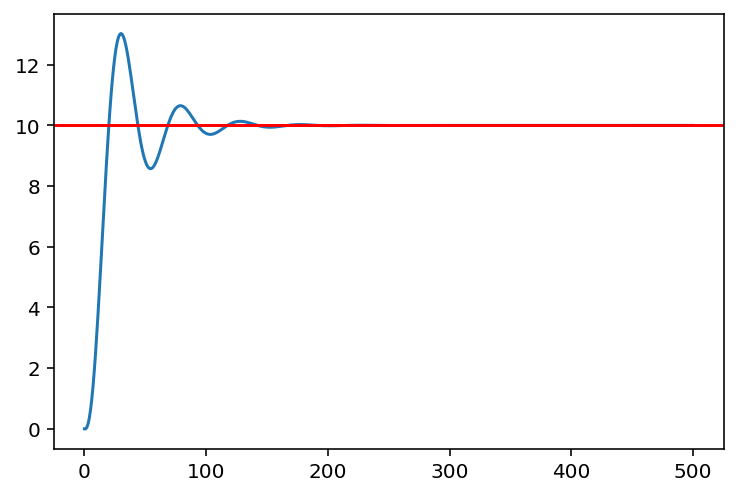

In [20]:
env = drone.DroneEnv(gravity=-10)
observations, actions = drone.simulate(env, 
                                       n=500, 
                                       kp=1.2, 
                                       ki=0.1, 
                                       kd=10, 
                                       render=True)
plt.plot(observations)
plt.axhline(env.goal, color='red')

Episode finished after 403 timesteps


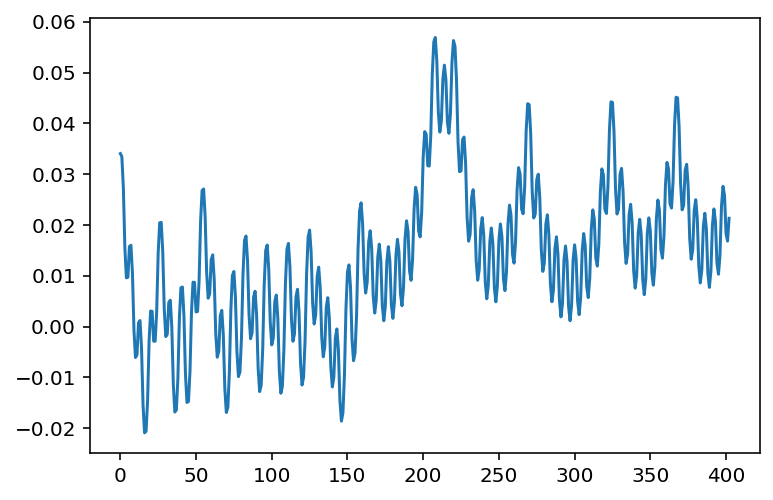

In [31]:
import gym
#
env = gym.make('CartPole-v0').env
observation = env.reset()
angles = []
observations = [observation]
last_error = None
integral = 0
for t in range(500):
    env.render()
    action = env.action_space.sample()

    #print(observation)
    angle = observation[2]
    error = angle - 0.02
    integral += error
    diff = 0 if last_error is None else error - last_error
    kp = 0.1
    ki = 0.001
    kd = 2.0
    action = kp*angle + ki*integral + kd*diff
    action = int((action/abs(action) + 1 )/2)
    angles.append(angle)
    last_error = error
    #print(angle)
    observation, reward, done, info = env.step(action)
    
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()
plt.plot(angles)

In [2]:
import gym

env = gym.make('CartPole-v0')
env.reset()

for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) #take a random action

env.close()